In [1]:
use "../3_output/regression_analysis_ind_with_ent_sent_june2020.dta", clear

In [2]:
su avg_sen*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576
avg_sent_s~t |      8,113    .5971259    .2507234          0    .886075
avg_sent_s~s |      8,113    .5662764    .2792114     -.5994      .9576


In [3]:
su ent_*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ent_mkt |      5,340    .2376226    .1857222          0    1.05492
  ent_others |      5,340    .2247373    .1915538          0   1.070593
    ent_self |      5,340    .0981426    .2199734          0   1.209574


## make labels and create demeaned vars

In [4]:
egen mean_ent_others = mean(ent_others)
gen ent_others_demean=ent_others-mean_ent_others



(2,773 missing values generated)


In [5]:
egen mean_ent_self = mean(ent_self)
gen ent_self_demean=ent_self-mean_ent_self



(2,773 missing values generated)


In [6]:
egen mean_avg_v2=mean(avg_v2)
gen avg_v2_demean=avg_v2-mean_avg_v2

In [7]:
egen mean_avgmean_others=mean(avgmean_others)
gen avgmean_others_demean=avgmean_others-mean_avgmean_others



(1,479 missing values generated)


In [8]:
gen ent_others_sq=ent_others*ent_others
gen ent_self_demean_sq=ent_self_demean*ent_self_demean


(2,773 missing values generated)

(2,773 missing values generated)


In [9]:

label variable ent_self_demean "Rating_Entropy_Self"
label variable ent_self "Rating_Entropy_Self"
label variable ent_others_demean "Rating_Entropy_Others"
label variable ent_others "Rating_Entropy_Others"
label variable avg_v2_demean "Average_Rating_Self"
label variable avg_v2 "Average_Rating_Self"
label variable avgmean_others_demean "Average_Rating_Others"
label variable avgmean_others "Average_Rating_Others"
label variable reviews_ct "Review_Count"
label variable log_experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"
label variable log_zip_rev "Market_LogRevenue"
label variable ent_others_sq  "Rating_Entropy_Others^2"
label variable ent_self_demean_sq "Rating_Entropy_Self^2"
label variable log_quotes "Installer Activity Level"

In [10]:
su avg_sent_score


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576


In [11]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576
avg_sent_s~t |      8,113    .5971259    .2507234          0    .886075
avg_sent_s~s |      8,113    .5662764    .2792114     -.5994      .9576


In [12]:
gen avg_sent_score_demean=avg_sent_score-.4119695
label variable avg_sent_score_demean "Average_Sentiment_Self"
gen avg_sent_score_others_demean=avg_sent_score_others- .5615071
label variable avg_sent_score_others_demean "Average_Sentiment_Others"
gen text_d_self_p50_demean=text_d_self_p50-0.0635868
label variable text_d_self_p50_demean  "Text-based_Entropy_Self"
gen text_d_others_p50_demean=text_d_others_p50-0.1245589
label variable text_d_others_p50_demean "Text-based_Entropy_Others"






(4,113 missing values generated)


(1,535 missing values generated)



# regular regression , quantitative measures, demeaned
- with areg (stata command), demeaned,  to get better R-square 

## Hausman for regular regression

In [13]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [14]:
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

qui:xtreg f.log_quotes  $iv_12_demean  , fe
estimates store fixed 
qui:xtreg f.log_quotes $iv_12_demean   , re 
estimates store random
hausman fixed random








                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |     fixed        random       Difference          S.E.
-------------+----------------------------------------------------------------
avg_v2_dem~n |   -.3034748    -.2661759       -.0372989        .0192533
 missing_avg |   -1.225582    -1.049137       -.1764453        .0928478
  reviews_ct |     .045321     .0463437       -.0010228        .0013836
avgmean_ot~n |   -.0070184    -.0331942        .0261758        .0184437
ent_others~n |    .6294955     .6882106       -.0587151        .0565503
ent_self_d~n |    .9359336     .9314591        .0044745        .1037552
          c. |
ent_others~n#|
          c. |
ent_others~n |   -2.478502    -2.506337        .0278346        .1207212
          c. |
ent_self_d~n#|
          c. |
ent_self_d~n |    -1.30135    -1.080349       -.2210017        .1737559
log_experi~e |    .2210942      .225913       -.0048188     

In [15]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 
preserve
drop if ent_others_demean==.


qui:areg f.log_quotes  $iv_0_demean   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean    , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo
restore
esttab est1 est2 est3 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)

//esttab est1 est2 est3 using reg_ind_all.csv ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
//esttab est1 est2 est3 using reg_ind_bigtable_areg.csv ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)







(2,773 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)



--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------
Rating_Entropy_Self                                         0.936*  
                                                          (0.011)   

Rating_Entropy_Sel~t                                       -1.301*  
                                                          (0.034)   

Rating_Entropy_Oth~s                        0.644**         0.629** 
                                          (0.001)         (0.001)   

Rating_Entropy_Oth~E                       -2.487***       -2.479***
                                          (0.000)         (0.000)   

Average_Rating_Self        -0.364***       -0.349***       -0.303** 
             

## Marginsplot 





  Variables that uniquely identify margins: ent_others_demean


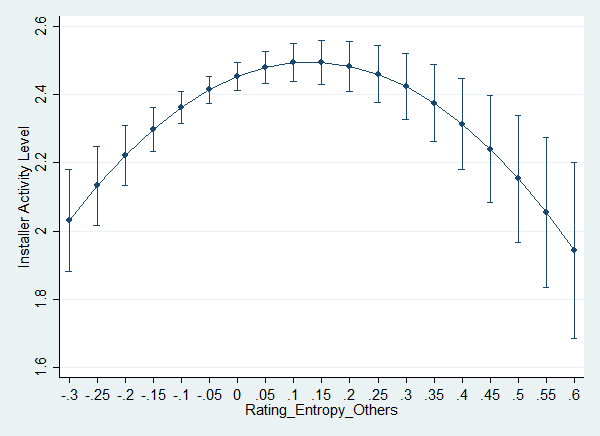

In [16]:
qui: areg  f.log_quotes    avg_v2     reviews_ct  avgmean_others ent_others_demean c.ent_others_demean#c.ent_others_demean ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n*, absorb(installer_id)
qui: margins , at(ent_others_demean=(-0.3(0.05)0.6))
marginsplot,ytitle("Installer Activity Level") title("") 

In [17]:
su ent_self


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    ent_self |      5,340    .0981426    .2199734          0   1.209574


In [18]:
su ent_self_demean


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
ent_self_d~n |      5,340   -1.38e-09    .2199734  -.0981426   1.111431






  Variables that uniquely identify margins: ent_self_demean


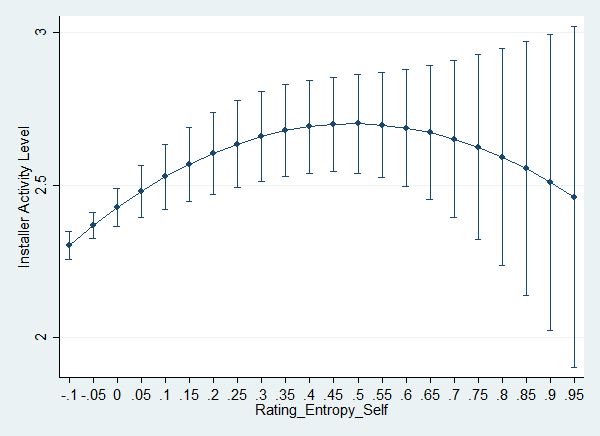

In [19]:
qui: areg  f.log_quotes    avg_v2     reviews_ct  avgmean_others ent_others_demean c.ent_others_demean#c.ent_others_demean ent_self_demean c.ent_self_demean#c.ent_self_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev, absorb(installer_id)
qui: margins , at(ent_self_demean=(-0.1(0.05)0.95))
marginsplot, ytitle("Installer Activity Level")  title("") 

# R Square Sharpley Decomp 

In [20]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [22]:
gen ent_others_demean_sq=ent_others_demean*ent_others_demean
gen ent_self_demean_sq=ent_self_demean*ent_self_demean


(2,773 missing values generated)

variable ent_self_demean_sq already defined


r(110);
r(110);


In [28]:
qui: xtreg f.log_quotes avg_v2_demean missing_avg reviews_ct avgmean_others_demean ent_others_demean ent_self_demean ent_others_demean_sq ent_self_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev,   vce(robust)


In [ ]:
shapley2, stat(r2) 

## summary stats associated with regular regressions 

In [15]:
set matsize 2000

In [ ]:
restore

In [21]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
 
eststo clear 
preserve
drop if ent_others_demean==.
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo filter
keep if _est_filter==1
keep  ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev 
outreg2 using summarystats_ind.doc, replace label sum(log) keep (ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev)
asdoc cor   ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev,label replace
pwcorr  ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev ,star(.05) 
restore





(2,773 observations deleted)



(735 observations deleted)



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  reviews_ct |      4,605     5.22975    6.515319          0         51
avgmean_ot~s |      4,605    4.883561    .1932303          1          5
  ent_others |      4,605    .2394583    .1873842          0   1.070593
    ent_self |      4,605    .1017694    .2227714          0   1.209574
log_experi~e |      4,605    1.608695    1.016364          0    3.78419
-------------+---------------------------------------------------------
temp_own_p~r |      4,605   -.0309957     .381567  -2.171179   3.211889
      avg_v2 |      4,605    4.525429    1.327224          0          5
 log_zip_rev |      4,605    11.60099    8.157138          0   22.30267


summarystats_ind.doc
dir : seeout

(obs=4,605)

             | ent_self ent_ot~s   avg_v2 avgmea~s review~t log_ex~e temp_o~r log_zi~v
-----

# with text-based measures

In [ ]:
replace text_d_others_p50_demean=0 if (text_d_others_p50_demean==.&ent_others_demean!=.)

In [ ]:
replace avgmean_others_demean=avg_sent_score_others_demean if avgmean_others_demean==.

In [ ]:
restore

## Text-based measures regression

In [ ]:
su avg_v2

In [ ]:
su avg_v2_demean

In [ ]:
global iv_text1_demean "avg_v2_demean  c.avg_v2_demean#c.avg_v2_demean  missing_avg reviews_ct  avgmean_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2_demean "avg_sent_score_demean  c.avg_sent_score_demean#c.avg_sent_score_demean  missing_avg_sent reviews_ct  avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
 
eststo clear 
drop if ent_others_demean==.
 
qui:areg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean c.text_d_self_p50_demean#c.text_d_self_p50_demean,  absorb(installer_id) vce(robust)
eststo
 
qui:areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean , absorb(installer_id) vce(robust)
eststo 
 
qui: areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

qui: areg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

esttab est1 est2 est3 est4 ,  order(text_d_self_p50_demean* c.text_d_self_p50_demean* text_d_others_p50_demean c.text_d_others* ent_self* c.ent_self* ent_other* c.ent_other*   avg* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )
restore 
esttab est1 est2 est3 est4 using reg_ind_withtext.csv , replace  order(text_d*self* c.text_d*self* text_d*other* c.text_d_others* avg* ent_self* c.ent_self* ent_other* c.ent_other* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )


In [ ]:
global iv_text1  "avg_v2   c.avg_v2#c.avg_v2  missing_avg reviews_ct  avgmean_others  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2  "avg_sent_score   c.avg_sent_score#c.avg_sent_score  missing_avg_sent reviews_ct  avg_sent_score_others  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
 
eststo clear 
drop if ent_others_demean==.
 
qui:areg f.log_quotes $iv_text1 c.text_d_others_p50_demean#c.text_d_others_p50_demean c.text_d_self_p50_demean#c.text_d_self_p50_demean,  absorb(installer_id) vce(robust)
eststo
 
qui:areg f.log_quotes $iv_text2 c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean , absorb(installer_id) vce(robust)
eststo 
 
qui: areg f.log_quotes $iv_text2 c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

qui: areg f.log_quotes $iv_text1 c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

esttab est1 est2 est3 est4 ,  order(text_d_self_p50_demean* c.text_d_self_p50_demean* text_d_others_p50_demean c.text_d_others* ent_self* c.ent_self* ent_other* c.ent_other*   avg* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )
restore 
//esttab est1 est2 est3 est4 using reg_ind_withtext.csv , replace  order(text_d*self* c.text_d*self* text_d*other* c.text_d_others* avg* ent_self* c.ent_self* ent_other* c.ent_other* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )


## Hausman for Text-based 

In [ ]:
xtset

In [ ]:
eststo clear

qui: xtreg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, fe
estimates store fixed 
qui: xtreg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, re
estimates store random
hausman fixed random

## Text-based measures summary stats 

In [ ]:
restore

In [ ]:
tab _est_filter

In [ ]:
restore

In [ ]:
xtset

In [ ]:
restore

In [ ]:
su avg_sent*

In [ ]:
su avg_sent_score avg_sent_score_others if ent_mkt!=.

In [ ]:
br

In [ ]:
global iv_text1_demean "avg_v2_demean  c.avg_v2_demean#c.avg_v2_demean  missing_avg reviews_ct  avgmean_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2_demean "avg_sent_score_demean  c.avg_sent_score_demean#c.avg_sent_score_demean  missing_avg_sent reviews_ct  avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
eststo clear
qui: areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo filter
keep if _est_filter==1 
outreg2 using summarystats_ind_textbased.doc, replace label sum(log) keep (avg_sent_score_demean avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean reviews_ct log_experience temp_own_price_diff_other log_zip_rev)
asdoc pwcorr avg_sent_score_demean avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean reviews_ct log_experience temp_own_price_diff_other log_zip_rev,label replace star(0.01)
restore





(4,113 observations deleted)

(246 observations deleted)

(0 observations deleted)




(275 observations deleted)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         avg |      3,339    4.866287    .3649865          1          5
avg_sent_s~e |      3,479    .6563698    .1843458     -.8268      .9576
        five |      3,479      6.1785    6.478082          0         46
        four |      3,479    .2457603     .695189          0          5
installer_id |      3,479    18521.82    6551.237        363      22992
-------------+---------------------------------------------------------
      market |      3,479    17.84248    13.97718         -1         36
         one |      3,479    .1063524    .4526612          0          5
quotes_count |      3,479    52.71055    117.3589          0       1417
  reviews_ct |      3,479    6.612532    6.921761          0         51
       three |  

In [ ]:
global iv_text1_demean "avg_v2_demean  c.avg_v2_demean#c.avg_v2_demean  missing_avg reviews_ct  avgmean_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2_demean "avg_sent_score_demean  c.avg_sent_score_demean#c.avg_sent_score_demean  missing_avg_sent reviews_ct  avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
eststo clear
su 
qui: areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo filter
keep if _est_filter==1 
//outreg2 using summarystats_ind_textbased.doc, replace label sum(log) keep (avg_sent_score_demean avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean reviews_ct log_experience temp_own_price_diff_other log_zip_rev)
asdoc pwcorr avg_sent_score_demean avg_v2 avg_sent_score_others_demean avgmean_others  text_d_others_p50_demean ent_others_demean text_d_self_p50_demean ent_self_demean ,label replace star(0.01)
restore





(4,113 observations deleted)

(246 observations deleted)

(0 observations deleted)



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         avg |      3,612    4.863811    .3695918          1          5
avg_sent_s~e |      3,754    .6564492    .1820967     -.8268      .9576
        five |      3,754    6.273841    6.607703          0         47
        four |      3,754    .2466702    .7012576          0          6
installer_id |      3,754    18589.71    6511.627        363      22992
-------------+---------------------------------------------------------
      market |      3,754    17.78023    13.94494         -1         36
         one |      3,754    .1116143    .4652123          0          5
quotes_count |      3,754    50.63133      114.04          0       1417
  reviews_ct |      3,754    6.714438    7.056241          0         52
       three |      3,754    .0466169    .2182

In [ ]:
corr ent_others text_d_others_p50

## Make variables for spline regression

- three knots 

In [ ]:
drop ent_*spl*

In [ ]:
mkspline ent_other_spl_2 2=ent_others,displayknots
mkspline ent_self_spl_2 2=ent_self, displayknots

In [ ]:
mkspline ent_other_spl_3 3=ent_others,displayknots
mkspline ent_self_spl_3 3=ent_self, displayknots

In [ ]:
label variable ent_other_spl_31 "Rating_Entropy_Others_1"
label variable ent_other_spl_32 "Rating_Entropy_Others_2"
label variable ent_other_spl_33 "Rating_Entropy_Others_3"
label variable ent_other_spl_21 "Rating_Entropy_Others_1"
label variable ent_other_spl_22 "Rating_Entropy_Others_2"

In [ ]:
label variable ent_self_spl_31 "Rating_Entropy_Self_1"
label variable ent_self_spl_32 "Rating_Entropy_Self_2"
label variable ent_self_spl_33 "Rating_Entropy_Self_3"
label variable ent_self_spl_21 "Rating_Entropy_Self_1"
label variable ent_self_spl_22 "Rating_Entropy_Self_2"

In [ ]:
su ent_other_spl_3*

In [ ]:
eststo clear
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_other_spl_2* ent_self_demean    c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_self_spl_2* ent_others_demean c.ent_others_demean#c.ent_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_other_spl_3* ent_self_demean    c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_self_spl_3* ent_others_demean c.ent_others_demean#c.ent_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
esttab,  keep(ent*spl*) order( ent_other_spl_2* ent_self_spl_2*)  p  label  scalars(r2 aic bic)
esttab using spline_reg.csv,  keep(ent*spl*) order( ent_other_spl_2* ent_self_spl_2*)  p    label  scalars(r2 aic bic) replace

## Dynamic Panel 

 
xtabond  f.log_quotes l(0/1).avg_v2 l(0/2).reviews_ct  l(0/2).avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev  , lags(2)  twostep noconstant

In [ ]:
estat sargan

In [ ]:
 
xtabond  f.log_quotes l(0/1).avg_v2 l(0/2).reviews_ct  l(0/2).avgmean_others  , lags(2) pre( ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev) twostep noconstant

In [ ]:
br

In [ ]:
eststo clear
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others     log_experience temp_own_price_diff_other missing_price_info log_zip_rev , nocons vce(robust) lags(2) two 
eststo 
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others   ent_self_demean ent_self_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev , nocons vce(robust) lags(2) two 
eststo 
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev , nocons vce(robust) lags(2) two 
eststo 


In [ ]:
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others     log_experience temp_own_price_diff_other missing_price_info log_zip_rev if (ent_others_demean!=.&ent_self_demean!=.), nocons vce(robust) lags(2) two 
eststo

In [ ]:
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others    ent_others_demean ent_others_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev if (ent_others_demean!=.&ent_self_demean!=.), nocons vce(robust) lags(2) two 
eststo

In [ ]:
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others    ent_self_demean ent_self_demean_sq ent_others  ent_others_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev if (ent_others_demean!=.&ent_self_demean!=.), nocons vce(robust) lags(2) two 
eststo

In [ ]:
esttab,  order(  log_quotes l.log_quotes ent_self* c.ent_self* ent_other* c.ent_other* avg_v2  avgmean_others ) drop(  missing* ) p  label    


In [ ]:
esttab using ind_dynamic2.csv,  order(  log_quotes l.log_quotes ent_self* c.ent_self* ent_other* c.ent_other* avg_v2  avgmean_others ) drop(  missing* ) p  label    


## IV 2sls 

In [ ]:
ivregress 2sls  f.log_quotes (log_quotes l.log_quotes  = l.avg_v2 l.reviews_ct l.temp_own_price_diff_other l.missing_price_info l.log_zip_rev )  avg_v2 reviews_ct temp_own_price_diff_other missing_price_info  avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience   ,    noconstant

In [ ]:
estat overid

## Dynamic Panel - overidentifying test

In [ ]:
 
xtdpd  f.log_quotes avg_v2  reviews_ct  avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev  , twostep  noconstant   dgmmiv(l2.(log_quotes reviews_ct)) lgmmiv(l.log_quotes l2.log_quotes)

estat sargan

In [ ]:
 
xtdpd  f.log_quotes avg_v2  reviews_ct  avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev  , twostep  noconstant dgmmiv(l2.(log_quotes)) lgmmiv(l.log_quotes l2.log_quotes l.reviews_ct avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other)

estat sargan

In [ ]:
xtabond f.log_quotes  ent_others ent_others_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct  avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant maxlag(2) 

In [ ]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct  avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant 

In [ ]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct  avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant  twostep
estat sargan

In [ ]:
estat sargan

In [ ]:
estat abond

In [ ]:
reg f.log_quotes  l.log_quotes l.avg_v2 l.reviews_ct  l.avgmean_others  l.log_experience l.temp_own_price_diff_other l.missing_price_info l.log_zip_rev l2.log_zip_rev ,noconstant 

In [ ]:
test  l.log_quotes

In [ ]:
test l.reviews_ct

In [ ]:
test l.avgmean_others

In [ ]:
test l.log_experience

In [ ]:
test l.temp_own_price_diff_other

In [ ]:
test l.log_zip_rev l2.log_zip_rev

In [ ]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct   ///
avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant  twostep
estat sargan

In [ ]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq      ///
   temp_own_price_diff_other missing_price_info log_zip_rev ,lags(2) noconstant  twostep pre(reviews_ct avg_v2 avgmean_others log_experience)
estat sargan

In [ ]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq      ///
   temp_own_price_diff_other missing_price_info log_zip_rev ,lags(2) noconstant  twostep pre(reviews_ct avg_v2 avgmean_others log_experience) maxlags(3)
estat sargan